In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [3]:
# Check if folder tickers exists

# Define the folder name
folder_name = '../tickers'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../tickers' folder already exists.


In [4]:
# Create wiki of cryptocurrencies
wiki = pd.DataFrame(columns=['Ticker','Name','Sector'])

# Create the data for the DataFrame
new_row_df = pd.DataFrame([['BTC-EUR','Bitcoin','Cryptocurrency'],['ETH-EUR','Etherum','Cryptocurrency'],['XRP-EUR','Ripple','Cryptocurrency'],['SOL-EUR','Solana','Cryptocurrency'],['ADA-EUR','Cardano','Cryptocurrency']], columns=['Ticker','Name','Sector'])

# Append the new row to the DataFrame
wiki = pd.concat([wiki, new_row_df], ignore_index=True)
wiki

,Ticker,Name,Sector
0,BTC-EUR,Bitcoin,Cryptocurrency
1,ETH-EUR,Etherum,Cryptocurrency
2,XRP-EUR,Ripple,Cryptocurrency
3,SOL-EUR,Solana,Cryptocurrency
4,ADA-EUR,Cardano,Cryptocurrency


In [5]:
# Convert the Ticker column to a list
index_list = wiki['Ticker'].tolist()

In [6]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
# Get the name of the notebook
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__'])
notebook_name = notebook_name.split('-')[0]

In [8]:
# Save all the tickers data
wiki[['Name','Sector','Ticker']].to_csv(f"../tickers/{notebook_name}.csv",index=True)

In [9]:
# Configuration of different parameters of the notebook
ticker = 'BTC-EUR'
year = '2025'

In [10]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2014-09-17,355.957367,355.957367,0.0,361.468506,351.586884,359.546204,0.0,16389166
2014-09-18,328.539368,328.539368,0.0,355.505402,319.789459,355.588409,0.0,26691849
2014-09-19,307.761139,307.761139,0.0,330.936707,298.921021,328.278503,0.0,29560103
2014-09-20,318.758972,318.758972,0.0,329.978180,303.931244,307.665253,0.0,28736826
2014-09-21,310.632446,310.632446,0.0,321.504517,306.502197,318.120514,0.0,20702625
2014-09-22,312.958771,312.958771,0.0,316.469116,309.170898,310.849762,0.0,18776342
2014-09-23,339.189758,339.189758,0.0,343.704376,307.343872,312.912079,0.0,35102351
2014-09-24,331.250000,331.250000,0.0,339.307556,327.882263,339.158630,0.0,23972840
2014-09-25,322.676605,322.676605,0.0,331.444672,321.226959,331.211639,0.0,21022658


In [11]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-03-11,72449.382812,72449.382812,0.0,77447.156250,71543.210938,74212.804688,0.0,49873851027
2025-03-12,75921.335938,75921.335938,0.0,76467.796875,70652.007812,72441.882812,0.0,50120708741
2025-03-13,76910.546875,76910.546875,0.0,77442.609375,73867.695312,75916.914062,0.0,37070244252
2025-03-14,74682.210938,74682.210938,0.0,77397.804688,73578.789062,76912.890625,0.0,28938982639
2025-03-15,76877.906250,76877.906250,0.0,78423.976562,74418.109375,74682.484375,0.0,27089396321
2025-03-16,77262.085938,77262.085938,0.0,77522.062500,76869.484375,76877.273438,0.0,12504464282
2025-03-17,75902.789062,75902.789062,0.0,78150.851562,75362.804688,77253.117188,0.0,19605632509
2025-03-18,77004.000000,77004.000000,0.0,77595.437500,75626.414062,75899.710938,0.0,22982206272
2025-03-19,75619.679688,75619.679688,0.0,77004.023438,74391.070312,77004.023438,0.0,22027899314


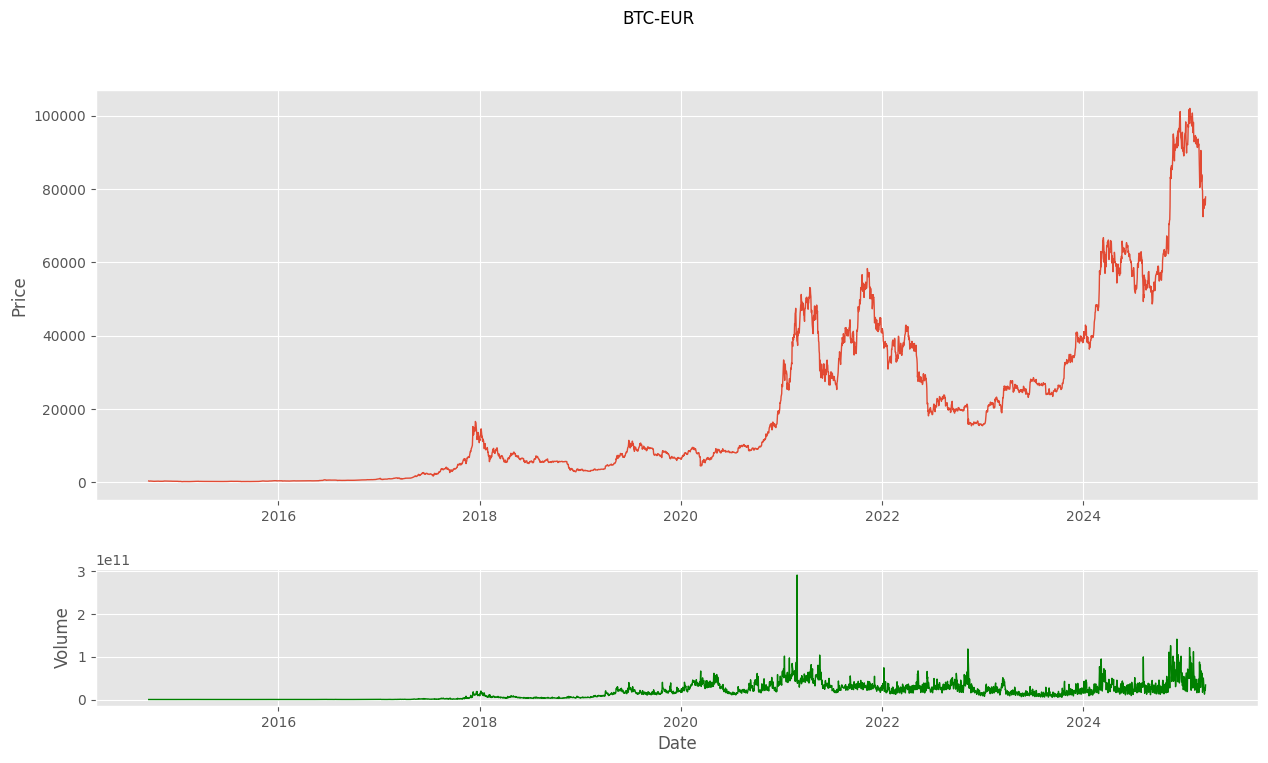

In [12]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [13]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [14]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
2014,264.709808,NaN
2015,396.616608,49.830718
2016,916.715454,131.133905
2017,11795.034180,1186.662522
2018,3256.927734,-72.387297
2019,6411.460449,96.856086
2020,23741.736328,270.301533
2021,40712.718750,71.481640
2022,15426.750000,-62.108279


In [15]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [16]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

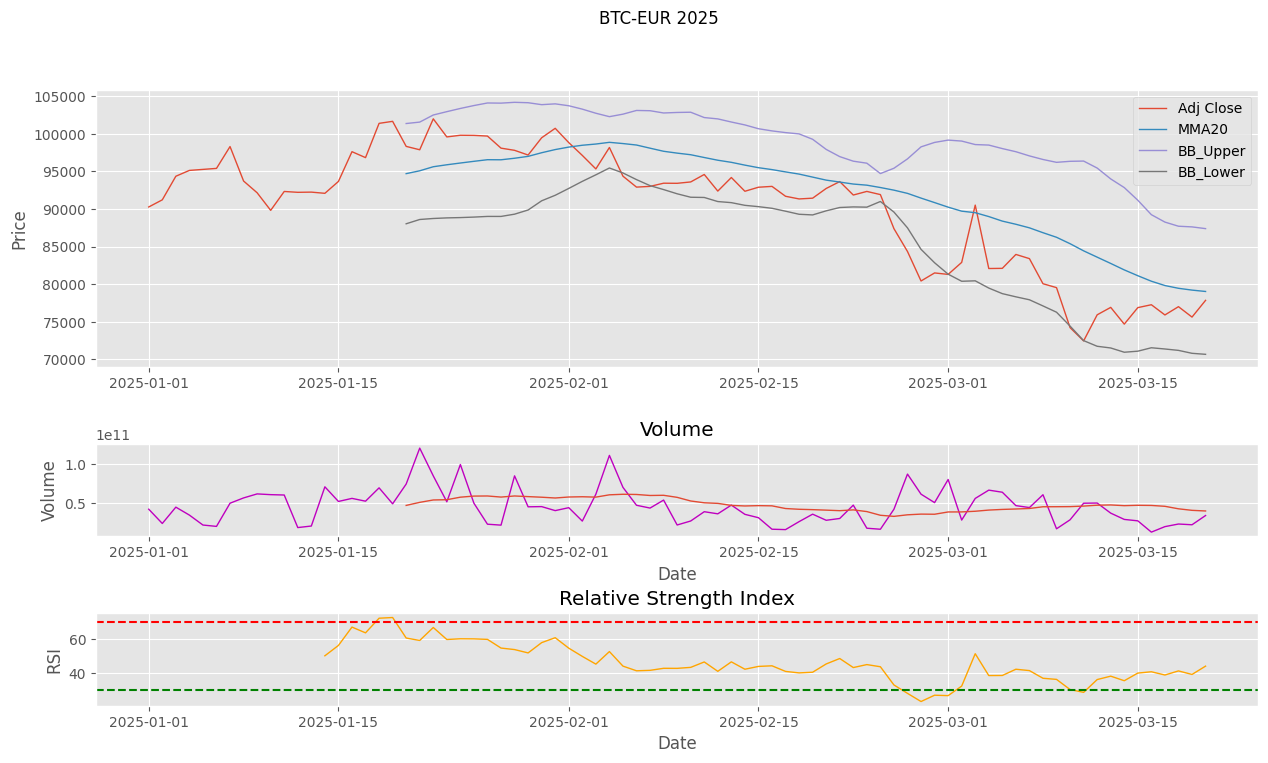

In [17]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [18]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [19]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-03-11,72449.382812,72449.382812,0.0,77447.156250,71543.210938,74212.804688,0.0,49873851027,2025,84432.473828,96377.914979,72487.032678,28.414491,-2.380886
2025-03-12,75921.335938,75921.335938,0.0,76467.796875,70652.007812,72441.882812,0.0,50120708741,2025,83591.905859,95448.402161,71735.409558,36.031821,4.792247
2025-03-13,76910.546875,76910.546875,0.0,77442.609375,73867.695312,75916.914062,0.0,37070244252,2025,82755.090625,94001.565208,71508.616042,38.054320,1.302942
2025-03-14,74682.210938,74682.210938,0.0,77397.804688,73578.789062,76912.890625,0.0,28938982639,2025,81896.264844,92850.346434,70942.183253,35.343444,-2.897309
2025-03-15,76877.906250,76877.906250,0.0,78423.976562,74418.109375,74682.484375,0.0,27089396321,2025,81123.192578,91164.433196,71081.951961,39.887529,2.940051
2025-03-16,77262.085938,77262.085938,0.0,77522.062500,76869.484375,76877.273438,0.0,12504464282,2025,80390.454297,89242.567357,71538.341237,40.673184,0.499727
2025-03-17,75902.789062,75902.789062,0.0,78150.851562,75362.804688,77253.117188,0.0,19605632509,2025,79816.285156,88259.095102,71373.475210,38.743734,-1.759332
2025-03-18,77004.000000,77004.000000,0.0,77595.437500,75626.414062,75899.710938,0.0,22982206272,2025,79449.165234,87708.664973,71189.665496,41.178204,1.450817
2025-03-19,75619.679688,75619.679688,0.0,77004.023438,74391.070312,77004.023438,0.0,22027899314,2025,79209.039844,87619.291478,70798.788209,39.075817,-1.797725


  0%|          | 0/5 [00:00<?, ?it/s]

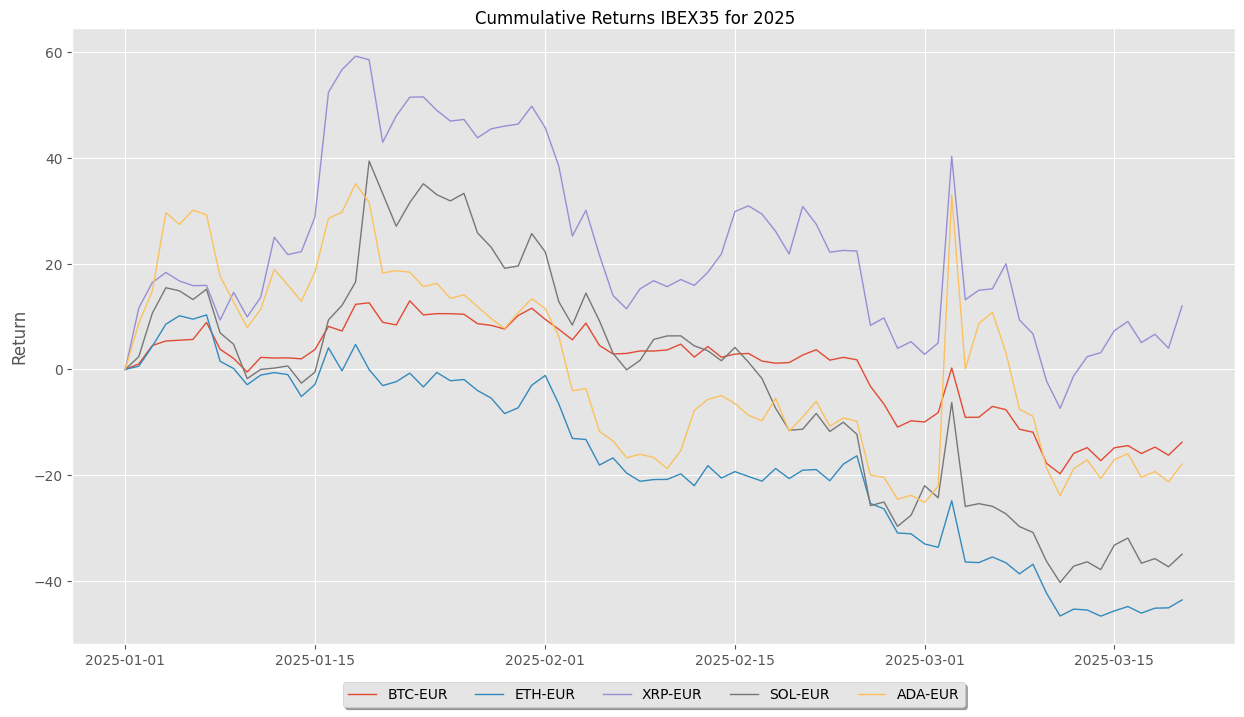

In [20]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [21]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/5 [00:00<?, ?it/s]

,Date,Ticker,Cummulative_Return
0,2025-03-20,XRP-EUR,12.017433
1,2025-03-20,BTC-EUR,-13.764790
2,2025-03-20,ADA-EUR,-17.907393
3,2025-03-20,SOL-EUR,-34.969662
4,2025-03-20,ETH-EUR,-43.620710


In [23]:
# Create also table of daily returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Daily_Return'] = daily_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Daily_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Daily_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Daily_Return'],ignore_index=True, ascending=False).head(40)

  0%|          | 0/5 [00:00<?, ?it/s]

,Ticker,Name,Date,Daily_Return
0,XRP-EUR,Ripple,2025-03-20,7.682459
1,ADA-EUR,Cardano,2025-03-20,4.271699
2,SOL-EUR,Solana,2025-03-20,3.804971
3,BTC-EUR,Bitcoin,2025-03-20,2.942025
4,ETH-EUR,Etherum,2025-03-20,2.752578
